#Course: Computer Networks - 1
#Project: Network Attack Prediction            
#Name: Ajinkya Vikas Pophale
#Batch: 131

#Import all the required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset


In [ ]:
df = pd.read_csv("train_rem.csv")

# **Basic EDA**

In [ ]:
df.head()

,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,1,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
1,2,0,tcp,http,SF,54540,8314,2,1,1,...,178,1.0,0.0,0.01,0.00,0.00,0.0,0.01,0.01,back.
2,3,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.00,0.0,1.00,1.00,satan.
3,4,0,icmp,eco_i,SF,8,0,0,0,0,...,86,1.0,0.0,1.00,0.51,0.00,0.0,0.00,0.00,ipsweep.
4,5,0,tcp,other,REJ,0,0,0,0,0,...,1,0.0,1.0,0.00,0.00,0.07,0.0,0.93,1.00,satan.


In [ ]:
df.shape

(12989, 33)

In [ ]:
df.describe()

,Id,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,num_shells,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,...,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000,12989.000000
mean,6495.000000,0.157056,5865.168065,1097.630072,0.212795,0.153668,0.104935,0.000154,0.000077,0.000077,...,139.733929,111.833397,0.514449,0.438340,0.509831,0.218841,0.019981,0.027064,0.421735,0.438319
std,3749.745658,1.817548,16851.470935,4153.357121,0.614088,0.360645,0.306481,0.012408,0.008774,0.008774,...,121.745589,120.355996,0.496275,0.480339,0.483347,0.282489,0.051303,0.157883,0.456708,0.490593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6495.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,22.000000,1.000000,0.000000,0.540000,0.000000,0.000000,0.000000,0.050000,0.040000
75%,9742.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,0.500000,0.010000,0.000000,0.940000,1.000000
max,12989.000000,78.000000,54540.000000,238768.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,0.580000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12989 entries, 0 to 12988
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           12989 non-null  int64  
 1   duration                     12989 non-null  int64  
 2   protocol_type                12989 non-null  object 
 3   service                      12989 non-null  object 
 4   flag                         12989 non-null  object 
 5   src_bytes                    12989 non-null  int64  
 6   dst_bytes                    12989 non-null  int64  
 7   hot                          12989 non-null  int64  
 8   logged_in                    12989 non-null  int64  
 9   num_compromised              12989 non-null  int64  
 10  num_root                     12989 non-null  int64  
 11  num_shells                   12989 non-null  int64  
 12  num_access_files             12989 non-null  int64  
 13  count           

In [ ]:
df['protocol_type'].nunique()

3

In [ ]:
df['service'].value_counts()


eco_i        4663
other        3400
private      2592
http         1971
ftp_data       33
             ... 
efs             1
pop_3           1
http_443        1
http_2784       1
iso_tsap        1
Name: service, Length: 61, dtype: int64

In [ ]:
df['flag'].nunique()


9

Text(0.5, 1.0, 'Distribution of Target Variable - Attack Prediction')

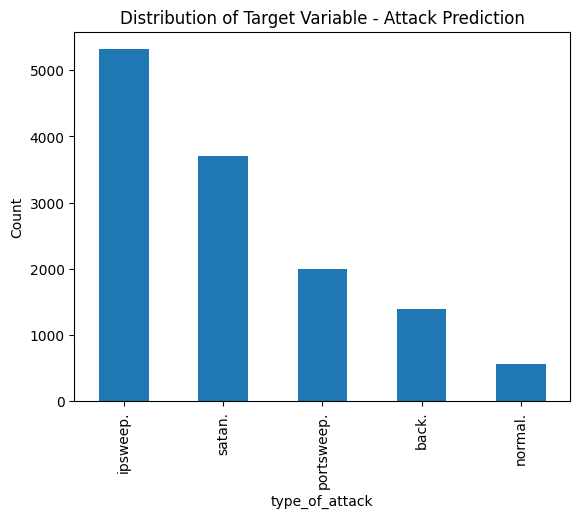

In [ ]:
df['type_of_attack'].value_counts().plot(kind='bar')
plt.xlabel("type_of_attack")
plt.ylabel("Count")
plt.title("Distribution of Target Variable - Attack Prediction")

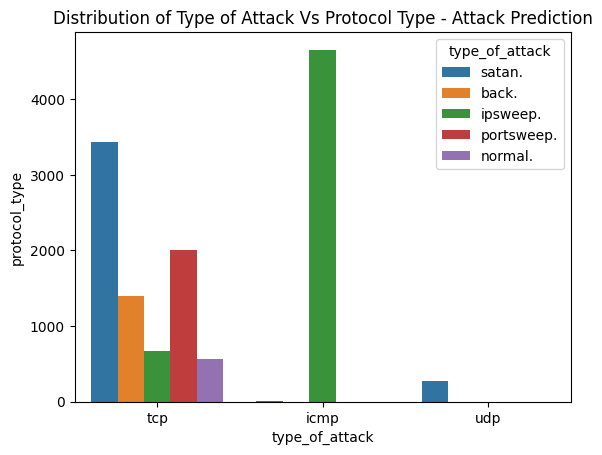

In [ ]:
sns.countplot(data=df,x='protocol_type',hue='type_of_attack')
plt.xlabel("type_of_attack")
plt.ylabel("protocol_type")
plt.title("Distribution of Type of Attack Vs Protocol Type - Attack Prediction")
plt.show()

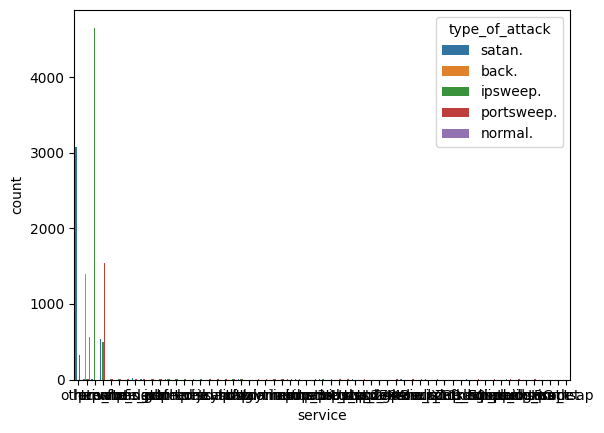

<Figure size 6000x6000 with 0 Axes>

In [ ]:
sns.countplot(data=df,x='service',hue='type_of_attack')
pyplot.figure(figsize=(60,60))
pyplot.show()

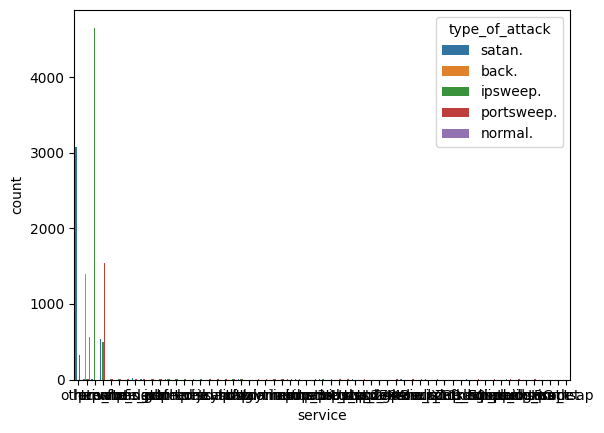

<Figure size 6000x6000 with 0 Axes>

In [ ]:
sns.countplot(data=df,x='service',hue='type_of_attack')
pyplot.figure(figsize=(60,60))
pyplot.show()

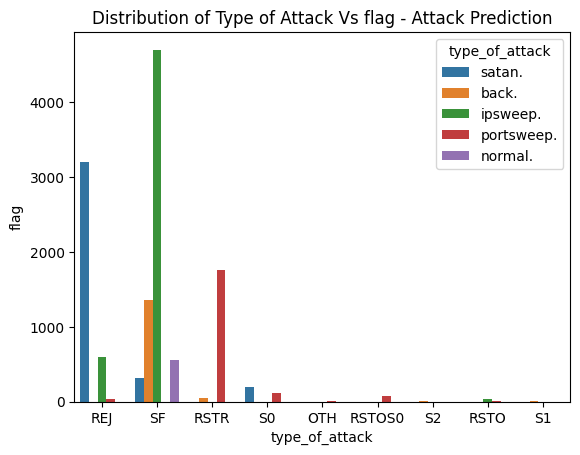

In [ ]:
sns.countplot(data=df,x='flag',hue='type_of_attack')
plt.xlabel("type_of_attack")
plt.ylabel("flag")
plt.title("Distribution of Type of Attack Vs flag - Attack Prediction")
plt.show()

In [ ]:
# df_data_ipsweep = df[df['type_of_attack'] == 'ipsweep.']
# len_data1 = len(df_data_ipsweep)
# df_data_satan = df[df['type_of_attack'] == 'satan.'].sample(len_data1,replace=True)
# df_data_psweep=df[df['type_of_attack'] == 'portsweep.'].sample(len_data1,replace=True)
# df_data_back=df[df['type_of_attack'] == 'back.'].sample(len_data1,replace=True)
# df_data_normal=df[df['type_of_attack'] == 'normal.'].sample(len_data1,replace=True)
# df1 = pd.concat([df_data_ipsweep,
#                          	df_data_satan,df_data_psweep,df_data_back,df_data_normal])

# print(df1.shape)

<Axes: xlabel='srv_count', ylabel='Count'>

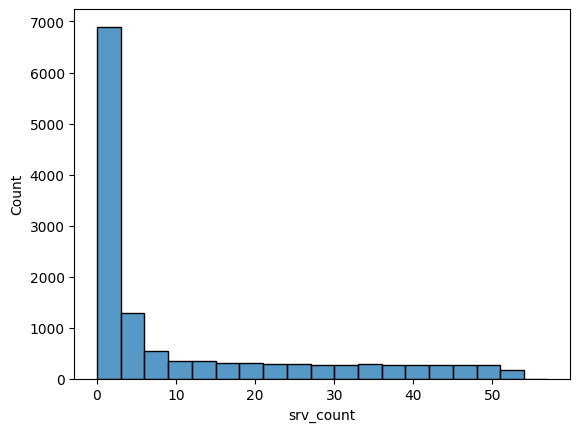

In [ ]:
sns.histplot(data=df, x="srv_count", binwidth=3)

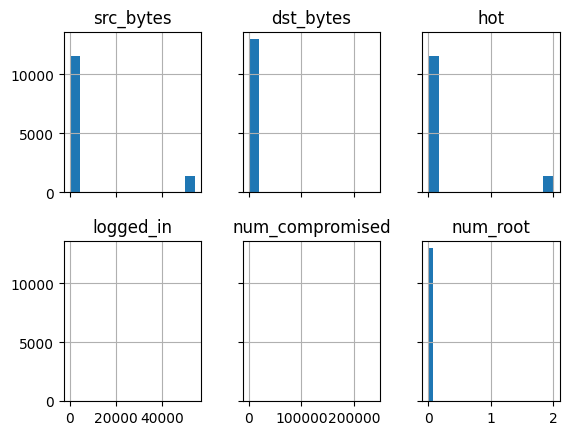

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

m=5
for i in range(2):
    for j in range(3):

        df.hist(column = df.columns[m], bins = 12, ax=ax[i,j], figsize=(20, 18))
        m+=1
# plt.xlabel("Values")
# plt.ylabel("Count")
# plt.title("Histogram of 5 Variables")
# plt.show()

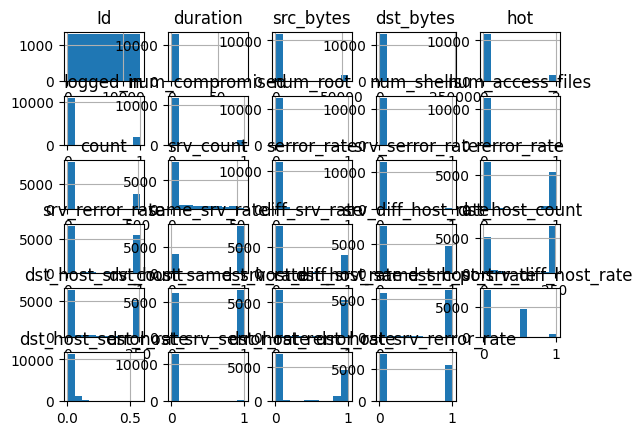

<Figure size 6000x6000 with 0 Axes>

In [ ]:
df.hist()
pyplot.figure(figsize=(60,60))
pyplot.show()

#OneHot Encoding of Independent Variables



In [ ]:
# df1.reset_index(inplace=True,drop=True)
# df1

In [ ]:
# checking features
cat = df.select_dtypes(include='O').columns[:-1].tolist()

In [ ]:
cat

['protocol_type', 'service', 'flag']

In [ ]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore',categories='auto')
# feature_arr = enc.fit_transform(df[cat]).toarray()
# feature_labels = enc.get_feature_names_out()
# feature_labels = np.array(feature_labels).ravel()
# features = pd.DataFrame(feature_arr, columns=feature_labels)
# # now concatenate the original data and the encoded data using pandas
# data = pd.concat([df, features], axis=1)
# data

In [ ]:
data=df.copy()
data.columns

Index(['Id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'num_root',
       'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'type_of_attack'],
      dtype='object')

In [ ]:
# data.drop(cat,axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12989 entries, 0 to 12988
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           12989 non-null  int64  
 1   duration                     12989 non-null  int64  
 2   protocol_type                12989 non-null  object 
 3   service                      12989 non-null  object 
 4   flag                         12989 non-null  object 
 5   src_bytes                    12989 non-null  int64  
 6   dst_bytes                    12989 non-null  int64  
 7   hot                          12989 non-null  int64  
 8   logged_in                    12989 non-null  int64  
 9   num_compromised              12989 non-null  int64  
 10  num_root                     12989 non-null  int64  
 11  num_shells                   12989 non-null  int64  
 12  num_access_files             12989 non-null  int64  
 13  count           

#Label Encoding of Target Column

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['type_of_attack'] = labelencoder.fit_transform(data['type_of_attack'])
data['protocol_type'] = labelencoder.fit_transform(data['protocol_type'])
data['service'] = labelencoder.fit_transform(data['service'])
data['flag'] = labelencoder.fit_transform(data['flag'])

# Define Independent and Dependent features

In [ ]:
X = data.drop(['Id','type_of_attack','hot','srv_serror_rate','dst_host_srv_serror_rate'], axis = 1)
y = data['type_of_attack']

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # the independent variables set

# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns

# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
# 						for i in range(len(X.columns))]

# vif_data


In [ ]:
# vif_data[:30]

## Load Test data

In [ ]:
test_data = pd.read_csv('test_rem.csv')

In [ ]:
test_data.head()

,Id,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,icmp,eco_i,SF,8,0,0,0,0,...,2,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
1,2,0,icmp,eco_i,SF,8,0,0,0,0,...,2,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
2,3,0,icmp,eco_i,SF,8,0,0,0,0,...,2,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
3,4,0,icmp,eco_i,SF,8,0,0,0,0,...,1,117,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0
4,5,0,icmp,eco_i,SF,8,0,0,0,0,...,1,255,1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0


In [ ]:
test_data.shape

(5567, 32)

In [ ]:
test_data.describe()

,Id,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,num_root,num_shells,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,5567.000000,5567.000000,5.567000e+03,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000,5567.0,5567.0,...,5567.000000,5567.000000,5567.000000,5567.000000,5567.00000,5567.000000,5567.000000,5567.000000,5567.000000,5567.000000
mean,2784.000000,2.471888,1.304305e+05,1108.469553,0.213580,0.153763,0.104904,0.000719,0.0,0.0,...,139.905515,111.359080,0.515705,0.433113,0.50016,0.215818,0.020296,0.027850,0.415764,0.430855
std,1607.198805,170.816183,9.292980e+06,3466.254112,0.614394,0.360754,0.309955,0.053610,0.0,0.0,...,121.756441,119.908373,0.496369,0.479075,0.48350,0.279295,0.051660,0.160138,0.455321,0.489645
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1392.500000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2784.000000,0.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,255.000000,22.000000,1.000000,0.000000,0.42000,0.000000,0.000000,0.000000,0.050000,0.040000
75%,4175.500000,0.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,255.000000,255.000000,1.000000,1.000000,1.00000,0.500000,0.020000,0.000000,0.940000,1.000000
max,5567.000000,12743.000000,6.933756e+08,91229.000000,3.000000,1.000000,4.000000,4.000000,0.0,0.0,...,255.000000,255.000000,1.000000,1.000000,1.00000,1.000000,0.580000,1.000000,1.000000,1.000000


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           5567 non-null   int64  
 1   duration                     5567 non-null   int64  
 2   protocol_type                5567 non-null   object 
 3   service                      5567 non-null   object 
 4   flag                         5566 non-null   object 
 5   src_bytes                    5567 non-null   int64  
 6   dst_bytes                    5567 non-null   int64  
 7   hot                          5567 non-null   int64  
 8   logged_in                    5567 non-null   int64  
 9   num_compromised              5567 non-null   int64  
 10  num_root                     5567 non-null   int64  
 11  num_shells                   5567 non-null   int64  
 12  num_access_files             5567 non-null   int64  
 13  count             

In [ ]:
test_data['protocol_type'].nunique()

3

In [ ]:
test_data['service'].nunique()


51

In [ ]:
test_data['flag'].nunique()


8

In [ ]:
test_data['flag'][4799:4805]

4799    NaN
4800    REJ
4801     S0
4802    REJ
4803     SF
4804    REJ
Name: flag, dtype: object

In [ ]:
test_data.loc[test_data.index[4799], 'flag'] = "REJ"

In [ ]:
test_data['flag'][4799:4805]


4799    REJ
4800    REJ
4801     S0
4802    REJ
4803     SF
4804    REJ
Name: flag, dtype: object

#OneHot Encoding of Independent Variables



In [ ]:
# checking features
cat = test_data.select_dtypes(include='O').columns.tolist()

In [ ]:
cat

['protocol_type', 'service', 'flag']

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
test_data['protocol_type'] = labelencoder.fit_transform(test_data['protocol_type'])
test_data['service'] = labelencoder.fit_transform(test_data['service'])
test_data['flag'] = labelencoder.fit_transform(test_data['flag'])

In [ ]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore',categories='auto')
# feature_arr = enc.fit_transform(test_data[cat]).toarray()
# feature_labels = enc.get_feature_names_out()
# feature_labels = np.array(feature_labels).ravel()
# features = pd.DataFrame(feature_arr, columns=feature_labels)
# print(feature_labels)
# # now concatenate the original data and the encoded data using pandas
# data1 = pd.concat([test_data, features], axis=1)
# data1

In [ ]:
data1=test_data.copy()
data1.columns

Index(['Id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'num_root',
       'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
# data1.drop(cat,axis=1,inplace=True)

In [ ]:
data1.drop('Id',axis=1,inplace=True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     5567 non-null   int64  
 1   protocol_type                5567 non-null   int64  
 2   service                      5567 non-null   int64  
 3   flag                         5567 non-null   int64  
 4   src_bytes                    5567 non-null   int64  
 5   dst_bytes                    5567 non-null   int64  
 6   hot                          5567 non-null   int64  
 7   logged_in                    5567 non-null   int64  
 8   num_compromised              5567 non-null   int64  
 9   num_root                     5567 non-null   int64  
 10  num_shells                   5567 non-null   int64  
 11  num_access_files             5567 non-null   int64  
 12  count                        5567 non-null   int64  
 13  srv_count         

# Train and Test data Columns Comparisons

In [ ]:
df['service'].nunique()

61

In [ ]:
test_data['service'].nunique()


51

In [ ]:
df['service'].value_counts().nlargest(20)

eco_i         4663
other         3400
private       2592
http          1971
ftp_data        33
finger          22
remote_job      18
gopher          16
ssh             16
ftp             16
ctf             15
name            15
mtp             15
link            15
rje             15
telnet          14
domain          14
time            13
smtp            13
whois           13
Name: service, dtype: int64

In [ ]:
tr=df['service'].value_counts().nlargest(20).index.tolist()

In [ ]:
t=test_data['service'].value_counts().nlargest(20).index.tolist()

In [ ]:
set(tr)^set(t)

{10,
 11,
 12,
 14,
 15,
 16,
 17,
 20,
 23,
 25,
 26,
 32,
 36,
 38,
 39,
 45,
 46,
 5,
 50,
 8,
 'ctf',
 'domain',
 'eco_i',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'http',
 'link',
 'mtp',
 'name',
 'other',
 'private',
 'remote_job',
 'rje',
 'smtp',
 'ssh',
 'telnet',
 'time',
 'whois'}

In [ ]:
set(tr).difference(t)

{'ctf',
 'domain',
 'eco_i',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'http',
 'link',
 'mtp',
 'name',
 'other',
 'private',
 'remote_job',
 'rje',
 'smtp',
 'ssh',
 'telnet',
 'time',
 'whois'}

In [ ]:
set(t).difference(tr)


{5, 8, 10, 11, 12, 14, 15, 16, 17, 20, 23, 25, 26, 32, 36, 38, 39, 45, 46, 50}

In [ ]:
# X.drop(['flag_S1'],axis=1,inplace=True)#'service_IRC','service_auth','service_courier','service_exec','service_http_2784','service_imap4','service_klogin','service_kshell','service_ldap','service_nntp','service_pm_dump','service_shell'],axis=1,inplace=True)

In [ ]:
data1.drop(['hot','srv_serror_rate','dst_host_srv_serror_rate'],axis=1,inplace=True)#'service_aol','service_harvest'

In [ ]:
set(X.columns)^set(data1.columns)

set()

In [ ]:
set(X.columns).difference(data1.columns)


set()

In [ ]:
set(data1.columns).difference(X)


set()

# Train and Test Split



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,stratify=y,random_state=2023)

In [ ]:
X_train.shape

(2597, 28)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Standard Scaler

In [ ]:
scaler = StandardScaler().fit(data1)
scaled_test_data = scaler.transform(data1)

#Model Building


### Train the model

In [ ]:
# How to Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)
model = DecisionTreeClassifier()


In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()

In [ ]:
model.fit(X_train,y_train)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
print(X_train.shape,y_train.shape)

(2597, 28) (2597,)


# Model Prediction

In [ ]:
pred = model.predict(X_test)
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)


## Model Evaluation


In [ ]:
print('Accuracy score for model',accuracy_score(pred,y_test))
print('Accuracy score for model 1',accuracy_score(pred1,y_test))
print('Accuracy score for model 2',accuracy_score(pred2,y_test))

Accuracy score for model 0.999133949191686
Accuracy score for model 1 0.9979792147806005
Accuracy score for model 2 0.9948999230177059


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model
random_forest_model = RandomForestClassifier()
# Fit the random search object to the data
random_forest_model.fit(X_train, y_train)
# Make predictions
y_pred = random_forest_model.predict(X_test)

# Get the performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Precision:',precision_score(y_test, y_pred,average='weighted'))
print('F1_score:',f1_score(y_test, y_pred,average='weighted'))
print('Recall:',recall_score(y_test, y_pred,average='weighted'))



Accuracy: 0.9997113163972287
Precision: 0.9997115197910306
F1_score: 0.9997112943022832
Recall: 0.9997113163972287


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
X_train, X_val, y_train, y_val = train_test_split(
                                            	X_train, y_train,
                                            	test_size=0.33,
                                            	random_state=2023)
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model_pred_val = dt_model.predict(X_val)
dt_model_pred_test= dt_model.predict(X_test)

dt_model_pred_val = pd.DataFrame(dt_model_pred_val)
dt_model_pred_test = pd.DataFrame(dt_model_pred_test)

# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_model_pred_val = knn_model.predict(X_val)
knn_model_pred_test = knn_model.predict(X_test)

knn_model_pred_val = pd.DataFrame(knn_model_pred_val)
knn_model_pred_test = pd.DataFrame(knn_model_pred_test)
x_val = pd.DataFrame(X_val)
x_test = pd.DataFrame(X_test)

df_val_lr = pd.concat([x_val, knn_model_pred_val,
                    	dt_model_pred_val], axis=1)

df_test_lr = pd.concat([x_test, dt_model_pred_test,
                     	knn_model_pred_test],axis=1)

# Logistic Regression Model
lr_model = LogisticRegression()

lr_model.fit(df_val_lr,y_val)
lr_model.score(df_test_lr,y_test)

0.9970169361046959

In [ ]:
# pip install vecstack

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from vecstack import stacking

# initializing all the base model objects with default parameters
model_1 = LogisticRegression()
model_2 = xgb.XGBClassifier()
model_3 = RandomForestClassifier()

# putting all base model objects in one list
all_models = [model_1, model_2, model_3]

# computing the stack features
s_train, s_test = stacking(all_models, X_train, y_train,
						X_test, n_folds=4,shuffle=True)

# initializing the second-level model
final_model = model_1

# fitting the second level model with stack features
final_model = final_model.fit(s_train, y_train)

# predicting the final output using stacking
pred_final = final_model.predict(s_test)
# printing the mean squared error between real value and predicted value
print(accuracy_score(pred_final, y_test))
print(recall_score(pred_final, y_test,average='weighted'))



0.9974018475750578
0.9974018475750578


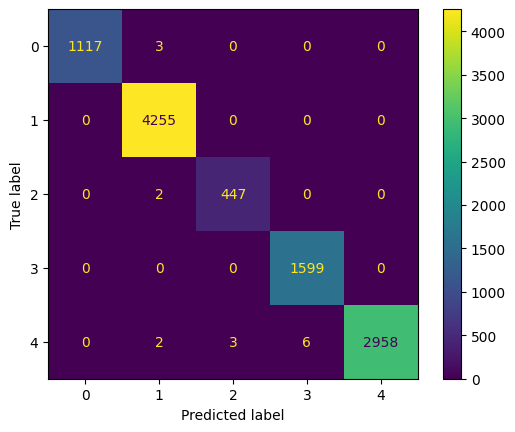

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred_final, average=None,labels=final_model.classes_)


(array([1.        , 0.99835758, 0.99333333, 0.99626168, 1.        ]),
 array([0.99732143, 1.        , 0.99554566, 1.        , 0.99629505]),
 array([0.99865892, 0.99917811, 0.99443826, 0.99812734, 0.99814409]),
 array([1120, 4255,  449, 1599, 2969]))

## Test Data Prediction

In [ ]:
test_pred = model.predict(scaled_test_data)
test_results=pd.DataFrame(test_data['Id'].values)
test_results.columns=['Id']
test_results["type_of_attack"] = (labelencoder.inverse_transform(test_pred))
test_results.to_csv('NAP_submission.csv', index = False)
# files.download('NAP_submission.csv')

In [ ]:
test_results

,Id,type_of_attack
0,1,REJ
1,2,REJ
2,3,REJ
3,4,REJ
4,5,REJ
...,...,...
5562,5563,RSTO
5563,5564,REJ
5564,5565,RSTO
5565,5566,RSTO
